**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [51]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase,
                             KNeighborsMixin,
                             SupervisedIntegerMixin,
                             ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbor = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        if self.algorithm == 'kd_tree':
            arr = np.array(X)
            self.train_y = np.array(y).astype(int)
            self.tree = neighbors.KDTree(arr)
        elif self.algorithm == 'brute':
            self.train_x = np.array(X)
            self.train_y = np.array(y).astype(int)
        self.number_of_classes = len(np.unique(self.train_y))

    def predict_brute(self, X):
        test_labels = []
        i1 = 0
        while i1 < X.shape[0]:
            test_dist = [[np.linalg.norm(X[i1] - self.train_x[i]),
                         self.train_y[i]] for i in
                         range(self.train_x.shape[0])]
            stat = [0 for i in range(self.number_of_classes)]
            for d in sorted(test_dist)[0:self.n_neighbor]:
                stat[d[1]] += 1
            test_labels.append(sorted(zip(stat,
                               range(self.number_of_classes)),
                               reverse=True)[0][1])
            i1 += 1
        return test_labels

    def predict_proba_brute(self, X):
        test_labels = np.array([])
        for point in X:
            test_dist = [[np.linalg.norm(point - self.train_x[i]),
                         self.train_y[i]] for i in
                         range(self.train_x.shape[0])]
            stat = [0 for i in range(self.number_of_classes)]
            for d in sorted(test_dist)[0:self.n_neighbor]:
                stat[d[1]] += 1

            test_labels = np.append(test_labels, stat)
        test_labels.shape = (X.shape[0], self.number_of_classes)
        test_labels = np.divide(test_labels, self.n_neighbor)
        return test_labels

    def predict_kd_tree(self, X):
        test_labels = np.array([])
        (dist, ind) = self.tree.query(X, k=self.n_neighbor)
        for y in self.train_y[ind]:
            test_labels = np.append(test_labels,
                                    np.bincount(y).argmax())
        return test_labels.astype(int)

    def predict_proba_kd_tree(self, X):
        test_labels = np.array([])
        (dist, ind) = self.tree.query(X, k=self.n_neighbor)
        for y in self.train_y[ind]:
            stat = np.array([])
            for i in range(self.number_of_classes):
                stat = np.append(stat, np.count_nonzero(y == i))
            test_labels = np.append(test_labels, stat)
        test_labels.shape = (X.shape[0], self.number_of_classes)
        test_labels = np.divide(test_labels, self.n_neighbor)
        return test_labels

    def predict(self, X):
        if self.algorithm == 'brute':
            return self.predict_brute(X)
        elif self.algorithm == 'kd_tree':
            return self.predict_kd_tree(X)

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            return self.predict_proba_brute(X)
        elif self.algorithm == 'kd_tree':
            return self.predict_proba_kd_tree(X)

    def score(self, X, y):
        vector = np.subtract(self.predict(X), y)
        summa = np.count_nonzero(vector)
        return 1 - summa / y.shape[0]

**IRIS**

In [52]:
iris = datasets.load_iris()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [54]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [55]:
%time clf.fit(X_train, y_train)

CPU times: user 1.82 ms, sys: 0 ns, total: 1.82 ms
Wall time: 1.42 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [56]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1.13 ms, sys: 3 µs, total: 1.13 ms
Wall time: 815 µs


In [57]:
%time clf.predict(X_test)

CPU times: user 2.95 ms, sys: 8 µs, total: 2.96 ms
Wall time: 2.72 ms


array([0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2])

In [58]:
%time my_clf.predict(X_test)

CPU times: user 21.8 ms, sys: 5 µs, total: 21.8 ms
Wall time: 21 ms


[0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2]

In [59]:
%time clf.predict_proba(X_test)

CPU times: user 2.16 ms, sys: 6 µs, total: 2.16 ms
Wall time: 1.95 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [60]:
%time my_clf.predict_proba(X_test)

CPU times: user 36.5 ms, sys: 1 µs, total: 36.5 ms
Wall time: 43.4 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [61]:
clf.score(X_test, y_test)

0.9333333333333333

In [62]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

best best_n_neighbors= 11


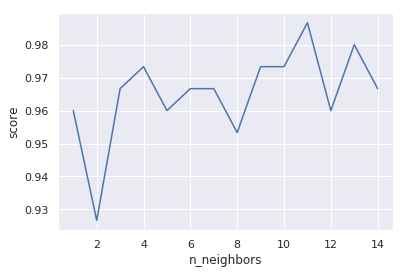

In [19]:
sns.set(style="darkgrid")

score = []
n_neighbors = []
best_n_neighbors = 0
best_score = 0
loop = 10
for i in range(1, 15):
    n_neighbors.append(i)
    clf = KNeighborsClassifier(n_neighbors=i)
    score_sum = 0
    for j in range(loop):
        X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                            iris.target,
                                                            test_size=0.1,
                                                            stratify=iris.target)
        clf.fit(X_train, y_train)
        score_sum += clf.score(X_test, y_test)
    sc = score_sum/loop  
    score.append(sc)
    if sc > best_score:
        best_score = sc
        best_best_n_neighbors = i

d = {'score': score, 'n_neighbors': n_neighbors}
df = pd.DataFrame(data=d)

print("best best_n_neighbors=", best_best_n_neighbors)
# print(df)

sns.lineplot(x="n_neighbors", y="score", data = df)

**MNIST**

In [20]:
mnist = fetch_mldata('MNIST original')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [34]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [35]:
%time clf.fit(X_train, y_train)

CPU times: user 38.5 s, sys: 236 ms, total: 38.7 s
Wall time: 38.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [36]:
%time my_clf.fit(X_train, y_train)

CPU times: user 13 ms, sys: 16 ms, total: 29 ms
Wall time: 28.5 ms


In [37]:
%time clf.predict(X_test)

CPU times: user 1min 21s, sys: 91.7 ms, total: 1min 21s
Wall time: 1min 22s


array([9., 6., 4., 3., 7., 3., 9., 5., 4., 7., 3., 4., 3., 5., 8., 0., 5.,
       2., 0., 1., 1., 6., 9., 1., 3., 0., 2., 1., 0., 8., 8., 8., 0., 7.,
       0., 8., 9., 6., 1., 0., 1., 5., 1., 5., 7., 9., 1., 6., 9., 2., 3.,
       6., 6., 9., 4., 5., 5., 3., 9., 9., 4., 2., 6., 5., 7., 4., 2., 1.,
       8., 3., 6., 6., 1., 3., 2., 9., 1., 4., 7., 1., 5., 3., 0., 4., 5.,
       0., 9., 0., 8., 0., 9., 8., 0., 9., 8., 2., 4., 2., 5., 2., 7., 6.,
       7., 3., 5., 4., 9., 7., 6., 6., 9., 7., 0., 7., 3., 4., 1., 0., 4.,
       5., 9., 0., 3., 7., 6., 1., 0., 3., 3., 7., 5., 9., 2., 3., 4., 6.,
       1., 5., 1., 5., 2., 1., 7., 3., 6., 2., 8., 5., 8., 2., 8., 0., 8.,
       4., 6., 9., 1., 4., 2., 2., 2., 7., 3., 2., 7., 0., 9., 4., 4., 2.,
       2., 7., 3., 6., 4., 6., 4., 9., 1., 4., 7., 3., 2., 7., 2., 4., 5.,
       7., 2., 6., 9., 7., 6., 0., 4., 9., 9., 5., 6., 1., 0., 5., 7., 1.,
       1., 3., 8., 9., 0., 6., 4., 8., 9., 1., 7., 7., 2., 9., 3., 7., 1.,
       8., 5., 8., 2., 4.

In [38]:
%time my_clf.predict(X_test)

CPU times: user 7min 49s, sys: 459 ms, total: 7min 49s
Wall time: 7min 52s


[9,
 6,
 8,
 3,
 8,
 3,
 9,
 8,
 8,
 7,
 8,
 4,
 3,
 5,
 1,
 0,
 5,
 2,
 0,
 1,
 1,
 6,
 9,
 1,
 8,
 0,
 8,
 1,
 0,
 8,
 8,
 8,
 0,
 7,
 0,
 9,
 9,
 6,
 1,
 0,
 1,
 8,
 1,
 5,
 7,
 9,
 1,
 6,
 9,
 8,
 3,
 6,
 6,
 9,
 4,
 8,
 5,
 8,
 9,
 9,
 4,
 8,
 6,
 5,
 7,
 4,
 2,
 1,
 8,
 3,
 6,
 6,
 1,
 1,
 8,
 9,
 1,
 8,
 7,
 1,
 5,
 3,
 8,
 9,
 8,
 0,
 9,
 0,
 8,
 0,
 9,
 8,
 6,
 9,
 8,
 8,
 4,
 8,
 8,
 8,
 7,
 6,
 7,
 8,
 9,
 4,
 9,
 7,
 6,
 6,
 9,
 7,
 0,
 7,
 3,
 9,
 1,
 0,
 1,
 5,
 8,
 0,
 8,
 7,
 6,
 1,
 0,
 3,
 3,
 9,
 8,
 9,
 2,
 8,
 9,
 1,
 8,
 5,
 1,
 8,
 8,
 1,
 7,
 3,
 8,
 7,
 8,
 5,
 8,
 2,
 8,
 0,
 8,
 4,
 8,
 9,
 1,
 9,
 8,
 2,
 2,
 9,
 3,
 8,
 7,
 0,
 1,
 7,
 8,
 3,
 2,
 9,
 1,
 6,
 4,
 6,
 4,
 9,
 1,
 9,
 9,
 8,
 8,
 7,
 8,
 4,
 9,
 7,
 8,
 6,
 9,
 7,
 6,
 0,
 3,
 9,
 9,
 6,
 6,
 1,
 8,
 5,
 7,
 1,
 1,
 3,
 8,
 9,
 0,
 6,
 8,
 1,
 9,
 1,
 9,
 7,
 8,
 7,
 3,
 9,
 1,
 8,
 8,
 8,
 2,
 4,
 6,
 0,
 0,
 7,
 8,
 1,
 0,
 9,
 7,
 4,
 2,
 2,
 0,
 1,
 4,
 7,
 7,
 4,
 3,
 4,
 1,
 1,
 7,
 7,


In [39]:
%time clf.predict_proba(X_test)

CPU times: user 1min 18s, sys: 51.9 ms, total: 1min 18s
Wall time: 1min 18s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 6s, sys: 44.1 ms, total: 1min 6s
Wall time: 1min 6s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [28]:
clf.score(X_test, y_test)

0.9657142857142857

In [69]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [63]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [42]:
%time clf.fit(X_train, y_train)

CPU times: user 36.9 s, sys: 164 ms, total: 37.1 s
Wall time: 37 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [65]:
%time my_clf.fit(X_train, y_train)

CPU times: user 39.8 s, sys: 284 ms, total: 40.1 s
Wall time: 40.5 s


In [44]:
%time clf.predict(X_test)

CPU times: user 1min 17s, sys: 28 ms, total: 1min 17s
Wall time: 1min 17s


array([1., 4., 6., 9., 6., 1., 1., 0., 2., 0., 2., 6., 1., 9., 7., 8., 1.,
       4., 8., 9., 1., 6., 6., 0., 4., 7., 4., 0., 1., 9., 1., 5., 1., 4.,
       7., 3., 6., 7., 3., 7., 9., 3., 7., 5., 6., 2., 8., 5., 8., 4., 7.,
       1., 0., 3., 0., 1., 6., 1., 4., 8., 7., 3., 1., 0., 1., 4., 6., 3.,
       9., 9., 2., 2., 9., 7., 4., 9., 4., 2., 2., 1., 9., 8., 1., 6., 7.,
       9., 7., 3., 6., 3., 0., 0., 4., 1., 2., 9., 3., 9., 8., 8., 8., 2.,
       5., 7., 9., 9., 0., 2., 4., 6., 3., 7., 4., 1., 0., 8., 7., 0., 2.,
       8., 9., 5., 3., 1., 0., 9., 7., 4., 1., 3., 2., 2., 4., 1., 0., 0.,
       9., 5., 3., 0., 3., 4., 3., 1., 6., 1., 3., 6., 7., 7., 1., 5., 3.,
       8., 4., 4., 3., 0., 9., 6., 5., 4., 7., 4., 3., 5., 2., 7., 1., 1.,
       8., 0., 3., 1., 1., 9., 6., 4., 6., 1., 2., 8., 9., 6., 3., 1., 4.,
       9., 0., 2., 9., 4., 0., 7., 8., 2., 3., 0., 0., 3., 6., 1., 9., 7.,
       4., 4., 3., 0., 1., 1., 5., 7., 6., 6., 3., 0., 2., 0., 5., 5., 3.,
       4., 2., 2., 1., 1.

In [66]:
%time my_clf.predict(X_test)

CPU times: user 1min 5s, sys: 20 ms, total: 1min 5s
Wall time: 1min 5s


array([8, 3, 8, 4, 8, 5, 9, 4, 0, 5, 9, 4, 3, 9, 1, 9, 4, 3, 9, 5, 0, 2,
       7, 5, 1, 2, 2, 1, 7, 8, 6, 5, 6, 5, 2, 8, 4, 6, 8, 6, 0, 9, 1, 5,
       1, 0, 8, 1, 5, 7, 8, 3, 5, 0, 3, 3, 6, 0, 0, 5, 0, 2, 9, 0, 8, 6,
       3, 9, 8, 1, 6, 7, 2, 1, 4, 5, 3, 3, 1, 3, 8, 0, 9, 3, 9, 1, 3, 0,
       0, 6, 4, 2, 5, 1, 9, 1, 3, 9, 0, 9, 7, 1, 3, 4, 7, 2, 1, 1, 1, 1,
       9, 6, 7, 8, 8, 8, 2, 3, 7, 6, 0, 9, 8, 0, 7, 9, 8, 2, 0, 8, 5, 7,
       4, 3, 2, 0, 7, 1, 9, 3, 9, 2, 0, 5, 5, 7, 6, 1, 1, 3, 5, 1, 6, 0,
       8, 6, 6, 8, 9, 6, 9, 8, 2, 3, 4, 5, 4, 8, 1, 1, 1, 5, 7, 3, 3, 4,
       6, 6, 1, 7, 9, 7, 8, 6, 8, 1, 7, 8, 6, 2, 0, 7, 1, 0, 0, 1, 8, 2,
       1, 2, 2, 8, 5, 5, 1, 8, 7, 8, 1, 1, 9, 0, 3, 3, 9, 3, 0, 9, 0, 4,
       5, 6, 1, 5, 5, 6, 9, 4, 6, 7, 6, 2, 8, 6, 1, 4, 8, 6, 6, 6, 8, 2,
       4, 2, 7, 6, 0, 8, 7, 1, 0, 1, 3, 7, 4, 2, 8, 5, 0, 3, 3, 3, 2, 0,
       1, 5, 8, 6, 3, 2, 8, 6, 7, 9, 6, 6, 2, 7, 7, 4, 2, 4, 9, 0, 9, 5,
       5, 7, 2, 0, 9, 1, 4, 4, 2, 8, 2, 9, 1, 9, 2,

In [46]:
%time clf.predict_proba(X_test)

CPU times: user 1min 18s, sys: 35.9 ms, total: 1min 18s
Wall time: 1min 18s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [67]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 6s, sys: 44 ms, total: 1min 6s
Wall time: 1min 6s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [50]:
clf.score(X_test, y_test)

0.9714285714285714

In [68]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных (одной короткой строчкой. на коленке)
# matplotlib - библиотека для визуализации данных (может визуализировать все и по-всякому)
# train_test_split - функция из sklearn, перемешивает данные и 
# режет их в заданной пропроции на тестовую и обучающую выборку

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - синтаксическая конструкция 
# для загрузки расширенй в юпитер

# StandardScaler (from sklearn.preprocessing import StandardScaler) - 
# класс из sklearn для статистичкской стандартизации фичей. Каждая фича обрабатывается независимо

# ClassifierMixin - класс из sklearn, содержащий метод score, который возвращает среднюю точность данных
# NeighborsBase - базовый класс sklearn для оценок ближайших соседей
# KNeighborsMixin - класс из sklearn для поиска k-соседей
# SupervisedIntegerMixin - класс sklearn, используемый для рандомизации в fit методе в классе NeighborsBase